# Statistical Analysis

[This notebook](https://github.com/dattalab/keypoint-moseq/blob/main/docs/source/analysis.ipynb) contains routines for analyzing the output of keypoint-MoSeq.

```{note}
The interactive widgets require jupyterlab launched from the `keypoint_moseq` environment. They will not work properly in jupyter notebook.
```


## Setup

We assume you have already have keypoint-MoSeq outputs that are organized as follows.
```
<project_dir>/               ** current working directory
└── <model_name>/            ** model directory
    ├── results.h5           ** model results
    └── grid_movies/         ** [Optional] grid movies folder
```
Use the code below to enter in your project directory and model name.

In [1]:
import keypoint_moseq as kpms

#project_dir='LDOPA_DLC' # the full path to the project directory
#model_name='2024_04_30-16_52_29' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='6OHDA' # the full path to the project directory
#model_name='' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='MitoPark3age data' # the full path to the project directory
#model_name='' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='6OHDA_DLC' # the full path to the project directory
#model_name='2024_05_14-16_53_08' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='MITOPARK_DLC' # the full path to the project directory
#model_name='2024_05_23-17_43_55_e6-4e4'

project_dir='6OHDA_DLC' # the full path to the project directory
model_name='6ohda'


In [2]:
import jax_moseq

kpms.__file__

'C:\\Programming\\keypoint-moseq\\keypoint_moseq\\__init__.py'

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Duration distribution'}, xlabel='syllable duration (frames)', ylabel='probability'>)

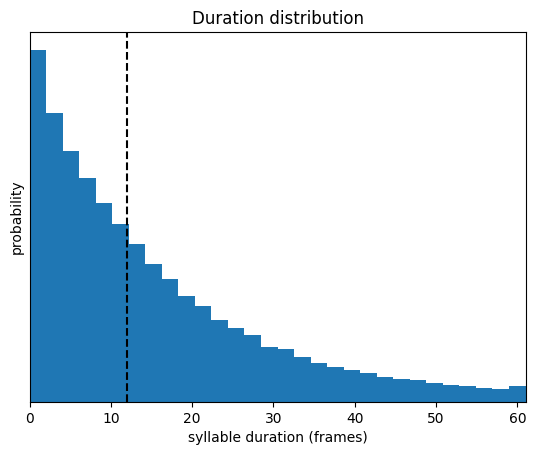

In [4]:
kpms.plot_duration_distribution(project_dir, model_name)

In [6]:
import matplotlib.pyplot as plt
import os

def save_analysis_figure(fig, plot_name, project_dir, model_name, save_dir):
    """Save an analysis figure.

    The figure is saved as both a .png and .pdf, either to `save_dir` if it is
    provided, or else to `project_dir/model_name/figures`.
    """
    if save_dir is None:
        save_dir = os.path.join(project_dir, model_name, "figures")
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, plot_name)
    fig.savefig(save_path + ".png", dpi=300)
    fig.savefig(save_path + ".svg", dpi=300)
    print(f"Saved figure to {save_path}.png")



## Assign Groups

The goal of this step is to assign group labels (such as "mutant" or "wildtype") to each recording. These labels are important later for performing group-wise comparisons.
- The code below creates a table called `{project_dir}/index.csv` and launches a widget for editing the table. To use the widget:
    - Click cells in the "group" column and enter new group labels.
    - Hit `Save group info` when you're done.
- **If the widget doesn't appear**, you also edit the table directly in Excel or LibreOffice Calc.

In [53]:
kpms.interactive_group_setting(project_dir, model_name)

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=              ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

## Generate dataframes

Generate a pandas dataframe called `moseq_df` that contains syllable labels and kinematic information for each frame across all the recording sessions. 

In [4]:
new_data = '6OHDA_DLC/video/' # can be a file, a directory, or a list of files
coordinates, confidences, bodyparts = kpms.load_keypoints(new_data, 'deeplabcut', extension='.h5')

results = kpms.load_results(project_dir, model_name)

# only include results for the new data
new_results = {k:v for k,v in results.items() if k in coordinates}
moseq_df = kpms.compute_moseq_df(project_dir, model_name, results_dict = new_results, smooth_heading=True) 
moseq_df

Loading keypoints: 100%|████████████████| 13/13 [00:01<00:00,  6.93it/s]


,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,session_20220802110154croppedcroppedDLC_resnet...,93.295748,172.275787,-2.368664,0.000000,0.000000,11,0,6OHDA-left,True
1,session_20220802110154croppedcroppedDLC_resnet...,93.006065,172.747760,-2.368664,0.292413,16.613465,11,1,6OHDA-left,False
2,session_20220802110154croppedcroppedDLC_resnet...,93.619378,172.300744,-2.248443,0.529850,22.767932,11,2,6OHDA-left,False
3,session_20220802110154croppedcroppedDLC_resnet...,94.415361,171.696005,-2.184365,0.679855,29.989447,11,3,6OHDA-left,False
4,session_20220802110154croppedcroppedDLC_resnet...,93.767100,171.071621,-2.184365,0.742415,27.001633,11,4,6OHDA-left,False
...,...,...,...,...,...,...,...,...,...,...
467475,session_20220803142251croppedcroppedDLC_resnet...,33.844495,60.212895,0.905739,-0.742452,19.080561,0,35956,6OHDA-right,False
467476,session_20220803142251croppedcroppedDLC_resnet...,34.524034,60.339100,0.903190,-0.618850,20.734771,0,35957,6OHDA-right,False
467477,session_20220803142251croppedcroppedDLC_resnet...,34.184712,60.260727,0.903190,-0.478215,10.447661,0,35958,6OHDA-right,False
467478,session_20220803142251croppedcroppedDLC_resnet...,33.714455,59.767644,0.850635,-0.326328,20.441267,0,35959,6OHDA-right,False


Next generate a dataframe called `stats_df` that contains summary statistics for each syllable in each recording session, such as its usage frequency and its distribution of kinematic parameters.

In [9]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df,
    results_dict = new_results, 
    min_frequency=0,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=30)                    # frame rate of the video from which keypoints were inferred

stats_df

save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df_all_syllables.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `stats_df` dataframe to 6OHDA_DLC\6ohda


In [15]:
#calculate the absolute number of occurences for multiple syllables

from itertools import product

for k in product(stats_df.name.unique(),stats_df.syllable.unique()):
    value = moseq_df.loc[(moseq_df.name == k[0]) & (moseq_df.syllable == k[1])].onset.sum()
    stats_df.loc[(stats_df.name == k[0]) & (stats_df.syllable == k[1]),'abs_number'] = value
stats_df



,group,name,syllable,frequency,duration,angle_mean,angle_std,angle_min,angle_max,area_mm_mean,...,timestamps_mean,timestamps_std,timestamps_min,timestamps_max,frame index_mean,frame index_std,frame index_min,frame index_max,syllable key,abs_number
0,6OHDA-left,42ba764a-f826-4e24-af8b-640afc15010d,0,0.076153,0.456934,-20.489445,14.230192,-54.565453,4.119938,869.25950,...,4.912798e+08,296877.669749,4.907774e+08,4.917741e+08,15125.746539,8906.324475,54.0,29955.0,labels (usage sort),0.0
1,6OHDA-left,9aff8955-5e0a-4dd0-b606-0f5228f50a40,0,0.104740,0.799069,-35.788680,27.175476,-107.297170,4.365437,783.53890,...,5.814405e+08,403064.732344,5.809583e+08,5.821505e+08,14506.380564,12091.934272,41.0,35808.0,labels (usage sort),0.0
2,6OHDA-left,d227c544-d58b-46bc-8c67-ba8860f826aa,0,0.036490,0.562698,-18.507000,15.846889,-58.122860,3.478185,738.89343,...,5.944110e+05,258437.577516,2.558184e+05,1.263884e+06,10464.784203,7753.140103,307.0,30549.0,labels (usage sort),0.0
3,6OHDA-right,2fd8634a-0add-4a05-9d3e-07aeff2357ec,0,0.080836,0.722701,35.581837,30.323540,0.916657,128.477570,763.74310,...,3.411844e+06,318222.178817,2.943381e+06,4.010146e+06,14092.904573,9546.681424,39.0,32042.0,labels (usage sort),0.0
4,6OHDA-right,7aa56c2c-a6a3-4437-a286-de5d7e93456e,0,0.142512,0.839831,38.408050,21.558447,1.573923,92.256546,793.82120,...,2.138541e+06,365267.791534,1.553216e+06,2.747981e+06,17597.769088,10958.048872,38.0,35881.0,labels (usage sort),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Controls,3e939552-e1e3-4cb6-bef1-d6e4ac586fb4,42,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,labels (usage sort),0.0
555,Controls,64142cb1-5a62-4f2e-a3c6-3859efb8c966,42,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,labels (usage sort),0.0
556,Controls,a1275ca3-f7d9-4380-b4a7-f43e9b1a80a3,42,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,labels (usage sort),0.0
557,Controls,debc123b-522b-447c-b96e-f138314251c3,42,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,labels (usage sort),0.0


C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to 6OHDA_DLC\2024_05_22-13_18_51 (kappa 1e6)\figures\Abs_num_spread.png


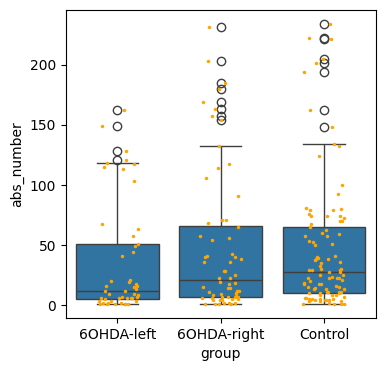

In [8]:
import seaborn as sns
figsize = (4,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.boxplot(data=stats_df, x='group', y='abs_number', ax=ax)
sns.stripplot(data=stats_df, x='group', y='abs_number', color="orange", jitter=0.2, size=2.5, ax=ax)

save_analysis_figure(fig, 'Abs_num_spread', project_dir, model_name, save_dir=None)
#ax.set_ylim([0, 4])

### **Optional:** Save dataframes to csv
Uncomment the code below to save the dataframes as .csv files

In [8]:
import os

# # save moseq_df
save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df_separate.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

# # save stats_df
save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df_separate.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to 6OHDA_DLC\2024_05_23-11_07_58 (kappa 1e3)
Saved `stats_df` dataframe to 6OHDA_DLC\2024_05_23-11_07_58 (kappa 1e3)


##  Label syllables

The goal of this step is name each syllable (e.g., "rear up" or "walk slowly").
- The code below creates an empty table at `{project_dir}/{model_name}/syll_info.csv` and launches an interactive widget for editing the table. To use the widget:
    - Select a syllable from the dropdown to display its grid movie.
    - Enter a name into the `label` column of the table (and optionally a short description too).
    - When you are done, hit `Save syllable info` at the bottom of the table.
- **If the widget doesn't appear**, you can also edit the file directly in Excel or LibreOffice Calc.

In [ ]:
kpms.label_syllables(project_dir, model_name, moseq_df)

## Compare between groups

Test for statistically significant differences between groups of recordings. The code below takes a syllable property (e.g. frequency or duration), plots its disribution for each syllable across for each group, and also tests whether the property differs significantly between groups. The results are summarized in a plot that is saved to `{project_dir}/{model_name}/analysis_figures`.

There are two options for setting the order of syllables along the x-axis. When `order='stat'`, syllables are sorted by the mean value of the statistic. When `order='diff'`, syllables are sorted by the magnitude of difference between two groups that are determined by the `ctrl_group` and `exp_group` keywords. Note `ctrl_group` and `exp_group` are not related to significance testing.

In [9]:
syllables_to_plot = [2,10]
stats_df1 = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
stats_df1 = stats_df1.pivot(index='name', columns='syllable', values=['group','abs_number'])
stats_df1['rotation_%'] = stats_df1[('abs_number',  2)]/(stats_df1[('abs_number',  2)] + stats_df1[('abs_number',  10)])


In [18]:
syllables_to_plot = [2,10]
stats_df1 = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
stats_df1

,group,name,syllable,frequency,duration,angle_mean,angle_std,angle_min,angle_max,area_mm_mean,...,timestamps_mean,timestamps_std,timestamps_min,timestamps_max,frame index_mean,frame index_std,frame index_min,frame index_max,syllable key,abs_number
26,6OHDA-left,42ba764a-f826-4e24-af8b-640afc15010d,2,0.029461,0.407547,-20.405424,16.391478,-54.765526,4.064354,810.86220,...,4.912893e+08,287501.957167,4.907854e+08,4.918401e+08,15410.370370,8625.052651,295.0,31936.0,labels (usage sort),0.0
27,6OHDA-left,9aff8955-5e0a-4dd0-b606-0f5228f50a40,2,0.081919,0.322619,-34.790820,23.456844,-104.573090,4.225398,719.59880,...,5.815053e+08,421518.394164,5.809598e+08,5.821548e+08,16450.709225,12645.543651,87.0,35937.0,labels (usage sort),0.0
28,6OHDA-left,d227c544-d58b-46bc-8c67-ba8860f826aa,2,0.045178,0.526923,-17.797619,14.060173,-53.310840,3.775653,726.20386,...,3.981832e+05,203081.365561,2.456856e+05,1.263384e+06,4577.941606,6092.450932,3.0,30534.0,labels (usage sort),0.0
29,6OHDA-right,2fd8634a-0add-4a05-9d3e-07aeff2357ec,2,0.094077,0.434568,29.293880,23.128930,2.296434,127.829250,706.45850,...,3.607320e+06,305843.418098,2.965981e+06,4.034179e+06,19957.195455,9175.318008,717.0,32763.0,labels (usage sort),0.0
30,6OHDA-right,7aa56c2c-a6a3-4437-a286-de5d7e93456e,2,0.152778,0.533597,35.342820,22.280920,2.533581,92.011950,726.02860,...,2.097039e+06,308406.124224,1.557483e+06,2.748181e+06,16352.708889,9252.195818,166.0,35887.0,labels (usage sort),0.0
31,6OHDA-right,b39941f5-c761-4001-bfb8-bb639afad271,2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,labels (usage sort),0.0
32,6OHDA-right,dfee0f87-ecc4-4180-a154-3e5d73cd8152,2,0.000701,0.133333,70.195860,0.093585,70.070990,70.295020,899.30140,...,4.965874e+08,43.107200,4.965874e+08,4.965875e+08,5153.500000,1.290994,5152.0,5155.0,labels (usage sort),0.0
33,Controls,0c64cae3-7e96-4389-b42f-db1b88aa5900,2,0.104608,0.403965,3.425021,5.610078,-27.035633,19.485418,725.75714,...,5.773083e+08,415259.567640,5.767452e+08,5.779372e+08,17032.146492,12457.778688,140.0,35900.0,labels (usage sort),0.0
34,Controls,3e939552-e1e3-4cb6-bef1-d6e4ac586fb4,2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,labels (usage sort),0.0
35,Controls,64142cb1-5a62-4f2e-a3c6-3859efb8c966,2,0.000550,0.066667,-8.639202,0.080857,-8.696377,-8.582028,932.03850,...,4.932617e+08,23.497300,4.932617e+08,4.932617e+08,25663.500000,0.707107,25663.0,25664.0,labels (usage sort),0.0


In [22]:
import pandas as pd

file = 'C:/Programming/keypoint-moseq/6OHDA_DLC/6ohda/stats_df_together.csv'
stats_df = pd.read_csv(file).rename(columns={'uuid':'name', 'usage':'frequency'})
#syllables_to_plot = [2, 10]
groups_to_plot = ['6OHDA', 'Control']
#syllables_to_plot = [23,28,37,43,44,49,51]
#stats_df1 = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
stats_df1 = stats_df.loc[stats_df.group.isin(groups_to_plot)]
stats_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration,abs_number
0,6OHDA,session_20220802110154croppedcroppedDLC_resnet...,0,0.207456,1.734577,-3.140487,3.140773,0.205764,9.969340,-188.088919,188.216766,35.753343,26.887495,0.385690,167.763159,0.249423,0.659336,432.0
1,6OHDA,session_20220802110154croppedcroppedDLC_resnet...,1,-0.121896,1.690163,-3.137431,3.141448,-0.259224,13.076911,-187.845017,187.635221,38.755199,25.441581,0.291468,150.498484,0.122979,0.322535,213.0
2,6OHDA,session_20220802110154croppedcroppedDLC_resnet...,2,0.082427,1.817987,-3.133966,3.137427,0.149017,15.314372,-187.920302,6.893485,39.788591,23.332111,0.792561,140.371414,0.154157,0.392135,267.0
3,6OHDA,session_20220802110154croppedcroppedDLC_resnet...,3,0.714399,1.593825,-3.133181,3.139356,0.129331,11.064066,-187.103918,4.932184,36.114287,21.107903,0.430431,129.874001,0.060624,0.454921,105.0
4,6OHDA,session_20220802110154croppedcroppedDLC_resnet...,4,-0.129800,1.471431,-3.138318,3.139148,-0.111601,5.505580,-187.718518,32.203933,19.313997,11.533755,0.113734,111.884537,0.083141,0.830093,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Control,session_20220803114108croppedcroppedDLC_resnet...,17,-1.071942,0.900948,-3.130963,3.030553,-0.795058,12.476780,-186.264186,3.031063,37.168350,23.471479,1.669624,113.321597,0.005345,0.681818,11.0
266,Control,session_20220803114108croppedcroppedDLC_resnet...,18,0.735272,2.053711,-3.141014,3.140571,0.336186,10.456273,-188.305292,188.398357,18.658298,10.211657,0.075926,96.575275,0.043732,1.195185,90.0
267,Control,session_20220803114108croppedcroppedDLC_resnet...,19,-0.312387,1.928562,-2.577708,2.790845,6.233843,61.933681,-173.330448,175.385598,31.376652,18.266122,10.648118,83.842048,0.003401,0.142857,7.0
268,Control,session_20220803114108croppedcroppedDLC_resnet...,24,-0.256929,1.620848,-3.132813,3.097676,-1.801797,19.016593,-185.318242,14.821492,22.478604,11.736826,1.214659,67.859298,0.004373,0.359259,9.0


In [35]:
len(moseq_df.syllable.unique())

44

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to 6OHDA_DLC\6ohda\figures\velocity_px_s_mean_stat_stats.png


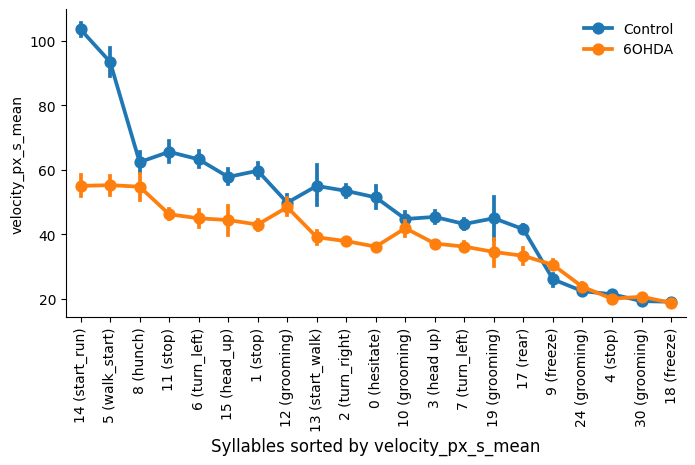

In [23]:
fig1, leg1 =kpms.plot_syll_stats_with_sem(
    stats_df1, project_dir, model_name,
    plot_sig=False,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='velocity_px_s_mean', # statistic to be plotted (e.g. 'frequency', 'duration' or 'velocity_px_s_mean')
    stat_order='velocity_px_s_mean',
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group='Control',   # name of the control group for statistical testing
    exp_group='6OHDA',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size
    groups=['Control', '6OHDA'], # groups to be plotted,
    in_y = 0.05
);

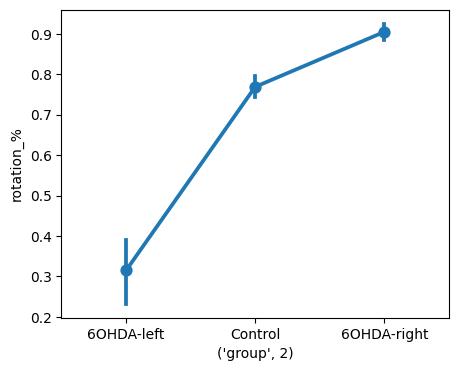

In [83]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(5,4))


# plot each group's stat data separately, computes groupwise SEM, and orders data based on the stat/ordering parameters
hue = "group" if groups is not None else None
ax = sns.pointplot(
    data=stats_df1,
    x=('group', 2),
    y='rotation_%',
    errorbar=("ci", 68),
    ax=ax
    )

<Axes: title={'center': 'Velocity change in relation to Control velocity'}, xlabel='Control', ylabel='Velocity decrease'>

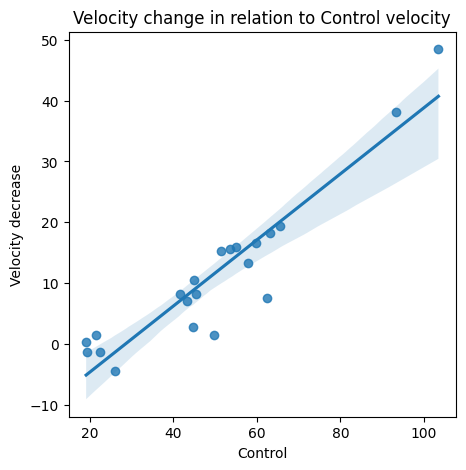

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

file = 'C:/Programming/keypoint-moseq/6OHDA_DLC/6ohda/stats_df_together.csv'
stats_df = pd.read_csv(file)
syllables_to_plot = list(range(30))
groups_to_plot = ['Control', '6OHDA']
#stats_df = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
#velocity = table['group','syllable','velocity_3d_mm_mean']
#frequency = table['frequency']

velocity1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','velocity_px_s_mean']].rename(columns={'velocity_px_s_mean':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
velocity2 = stats_df.loc[stats_df.group.isin([groups_to_plot[1]]),['syllable','velocity_px_s_mean']].rename(columns={'velocity_px_s_mean':groups_to_plot[1]}).pivot_table(index='syllable', dropna=True)
velocity = pd.concat([velocity1.reset_index(), velocity2.reset_index()], axis=1)
velocity['Velocity decrease'] = velocity[groups_to_plot[0]] - velocity[groups_to_plot[1]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Velocity change in relation to Control velocity')
sns.regplot(data=velocity, x=groups_to_plot[0], y='Velocity decrease', ax=ax)
#save_analysis_figure(fig, 'Velocity_correlation', project_dir, model_name, save_dir=None)

<Axes: title={'center': 'Frequency change in relation to Control frequency'}, xlabel='Control', ylabel='Frequency decrease'>

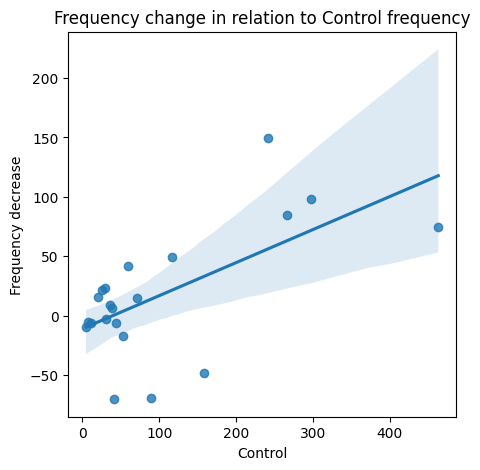

In [32]:
frequency1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','abs_number']].rename(columns={'abs_number':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
frequency2 = stats_df.loc[stats_df.group.isin([groups_to_plot[1]]),['syllable','abs_number']].rename(columns={'abs_number':groups_to_plot[1]}).pivot_table(index='syllable', dropna=True)
frequency = pd.concat([frequency1.reset_index(), frequency2.reset_index()], axis=1)
frequency['Frequency decrease'] = frequency[groups_to_plot[0]] - frequency[groups_to_plot[1]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Frequency change in relation to Control frequency')
sns.regplot(data=frequency, x=groups_to_plot[0], y='Frequency decrease', ax=ax)
#save_analysis_figure(fig, 'Frequency_correlation', project_dir, model_name, save_dir=None)

Saved figure to 6OHDA_DLC\6ohda\figures\Frequency_velocity_correlation.png


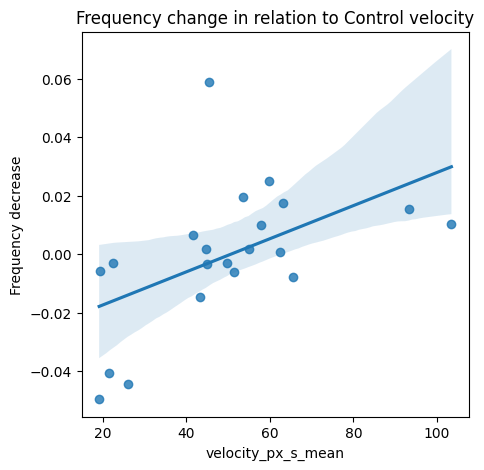

In [33]:
frequency1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','frequency', 'velocity_px_s_mean']].rename(columns={'frequency':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
frequency2 = stats_df.loc[stats_df.group.isin([groups_to_plot[1]]),['syllable','frequency']].rename(columns={'frequency':groups_to_plot[1]}).pivot_table(index='syllable', dropna=True)
frequency = pd.concat([frequency1.reset_index(), frequency2.reset_index()], axis=1)
frequency['Frequency decrease'] = frequency[groups_to_plot[0]] - frequency[groups_to_plot[1]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Frequency change in relation to Control velocity')
sns.regplot(data=frequency, x='velocity_px_s_mean', y='Frequency decrease', ax=ax)
save_analysis_figure(fig, 'Frequency_velocity_correlation', project_dir, model_name, save_dir=None)


Saved figure to 6OHDA_DLC\6ohda\figures\Frequency_correlation.png


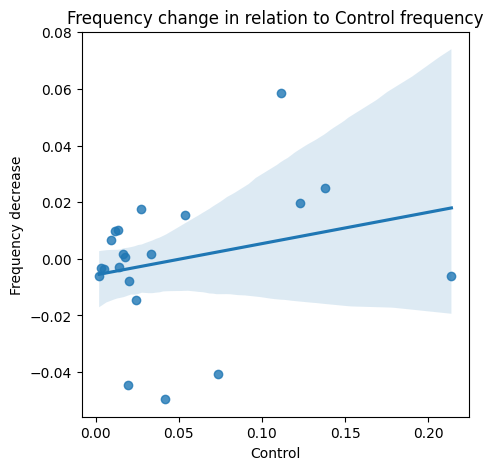

In [ ]:
frequency1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','frequency']].rename(columns={'frequency':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
frequency2 = stats_df.loc[stats_df.group.isin([groups_to_plot[1]]),['syllable','frequency']].rename(columns={'frequency':groups_to_plot[1]}).pivot_table(index='syllable', dropna=True)
frequency = pd.concat([frequency1.reset_index(), frequency2.reset_index()], axis=1)
frequency['Frequency decrease'] = frequency[groups_to_plot[0]] - frequency[groups_to_plot[1]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Frequency change in relation to Control frequency')
sns.regplot(data=frequency, x=groups_to_plot[0], y='Frequency decrease', ax=ax)
save_analysis_figure(fig, 'Frequency_correlation', project_dir, model_name, save_dir=None)

### Transition matrices
Generate heatmaps showing the transition frequencies between syllables.

Group(s): 6OHDA-left, 6OHDA-right, Control
Saved figure to 6OHDA_DLC\6ohda\figures\transition_matrices.png


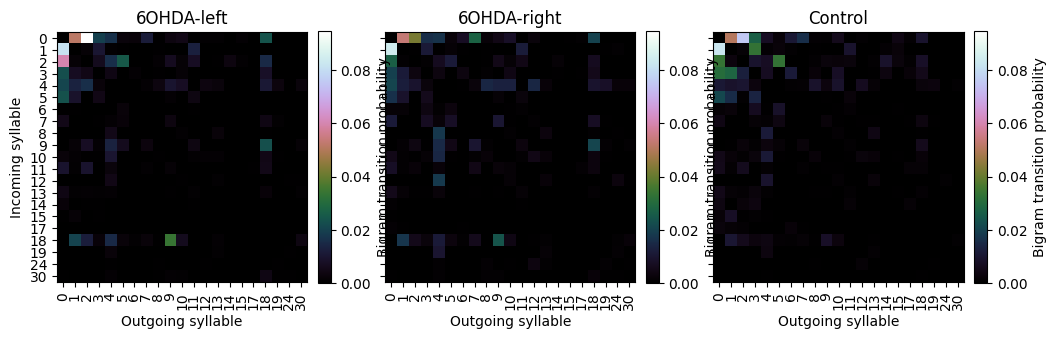

In [3]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005 # minimum syllable frequency to include
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

In [ ]:
# Reorded transition matrices

new_order = [0,1,5,3,10,6,2,8,9,4,11,7,12,13,14]

def rearrange_matrix(mats_list, new_order):
    new_mats_list = []
    for k in mats_list:
        k = k[:, new_order][new_order]
        new_mats_list.append(k)
    return new_mats_list

trans_mats_speed = rearrange_matrix(trans_mats, new_order)

kpms.visualize_transition_bigram(
    project_dir, model_name, [groups[0]], [trans_mats_speed[0]], syll_include, normalize=normalize, 
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)



In [25]:
#save transition matrices for entropy analyses
# save the resulting transition matrix from each group as an h5

import h5py
import numpy as np

with h5py.File('transition_matrices.h5','w') as h5f:
    h5f.create_dataset("transitions", data=np.asarray(trans_mats) )
    h5f.create_dataset("usages", data=np.asarray(usages) )
    h5f.create_dataset("included", data=np.asarray(syll_include) )

In [6]:
import h5py
import numpy as np


with h5py.File('6OHDA_DLC/6ohda/transition_matrices_together.h5','r') as h5f:
    trans_mats = h5f["transitions"][()]
    usages = h5f["usages"][()]
    syll_include = h5f["included"][()]

groups = ['6OHDA', 'Control']

### Syllable Transition Graph
Render transition rates in graph form, where nodes represent syllables and edges represent transitions between syllables, with edge width showing transition rate for each pair of syllables (secifically the max of the two transition rates in each direction).

Saved figure to 6OHDA_DLC\6ohda\figures\transition_graphs.png


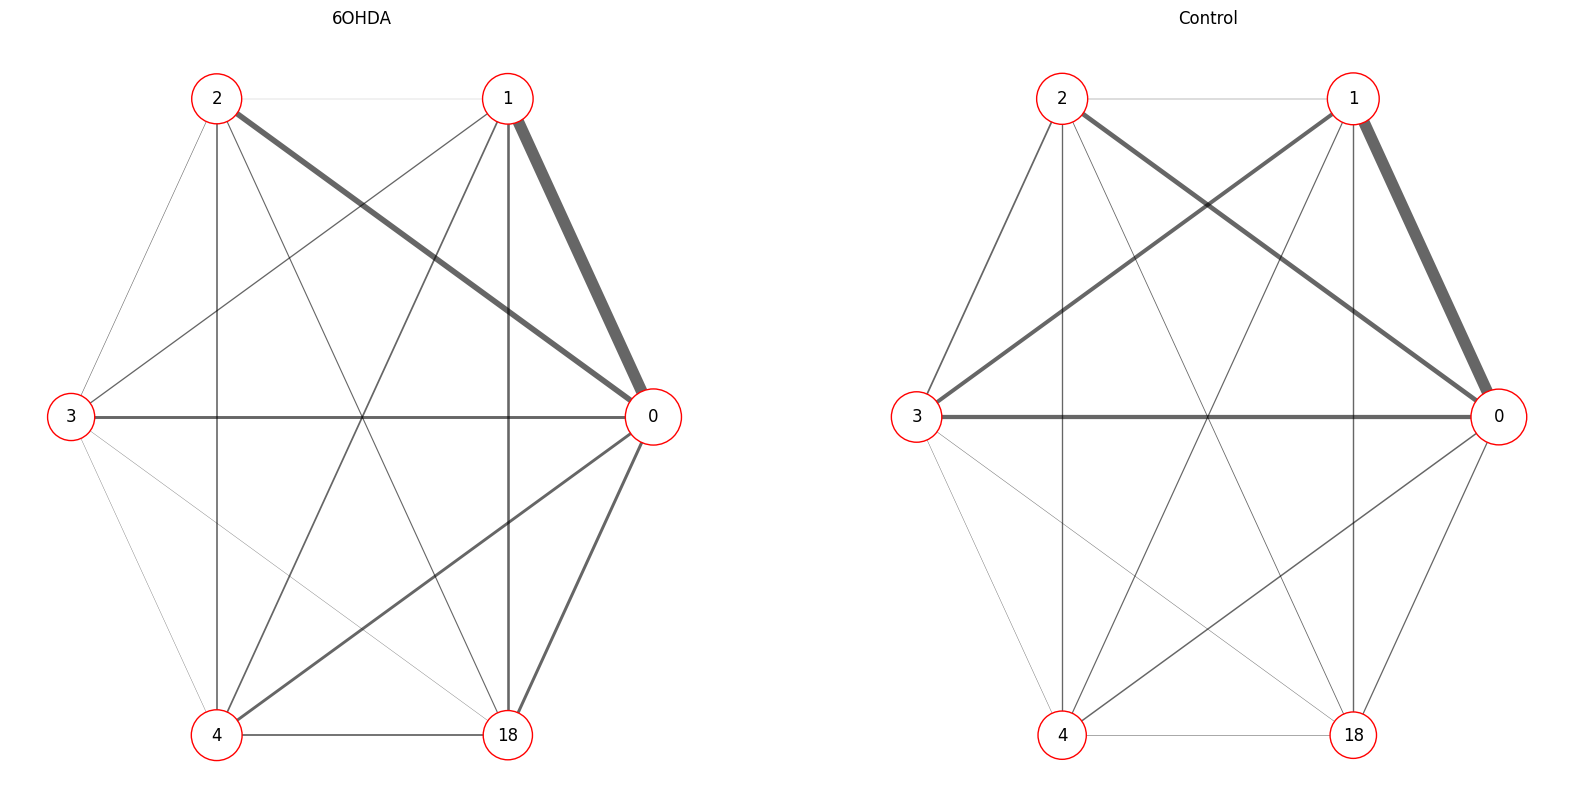

In [7]:
# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

Saved figure to 6OHDA_DLC\6ohda\figures\transition_graphs_diff.png


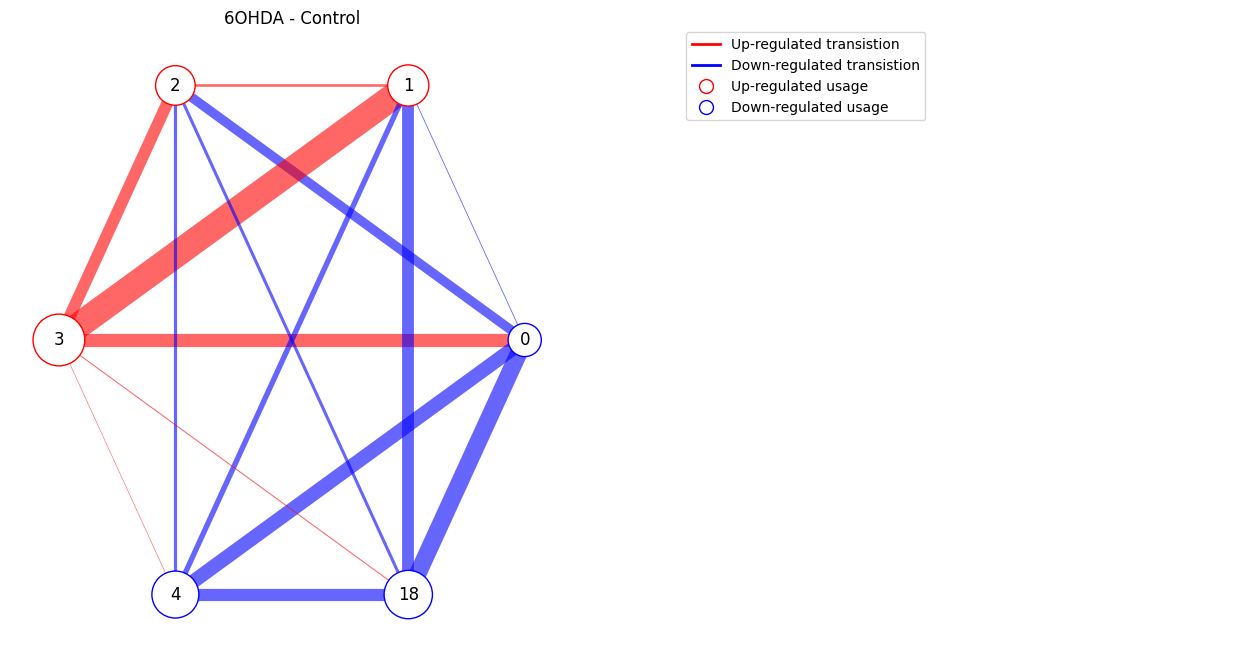

In [8]:
# Generate a difference-graph for each pair of groups.


kpms.plot_transition_graph_difference(project_dir, model_name, 
                                       groups, trans_mats,
                                      usages, syll_include, layout='circular') # transition graph layout ("circular" or "spring")

In [4]:
# Defining the functions to work with entropy matrices

import numpy as np
import scipy.linalg
import numpy as np
import pandas as pd
from os.path import join
from numpy import linalg as LA
from jax_moseq.utils import get_durations, get_frequencies



def local_entropy(tr_mat, truncate_syllable=40):
    """Computes the local entropy at each state of the MC defined by the transition
    probabilities P"""
    # TODO: Not optimal memory wise !!
    P = tr_mat[:truncate_syllable, :truncate_syllable]
    L = np.copy(P)
    L[P > 0] = np.log2(P[P > 0])
    K = np.dot(P, np.transpose(L))
    entropy_out = -1*np.diagonal(K)
    return entropy_out.reshape((P.shape[0], 1))



def entropy_rate(use_labels, use_tmxs, truncate_syllable=40, normalize='bigram',
                 smoothing=1.0, tm_smoothing=1.0):
    '''
    Computes entropy rate, base 2 using provided syllable labels. If
    syllable labels have not been re-labeled by usage, this function will do so.
    Parameters
    ----------
    use_labels (list or np.ndarray): a list of label arrays, where each entry in the list
            is an array of labels for one subject.
    use_tmxs (list or np.ndarray): a list of transition matrixes precalculated.
    truncate_syllable (int): maximum number of labels to keep for this calculation.
    normalize (str): the type of transition matrix normalization to perform. Options
            are: 'bigram', 'rows', or 'columns'.
    smoothing (float): a constant added to label usages before normalization
    tm_smoothing (float): a constant added to label transtition counts before normalization.
   
    Returns
    -------
    ent (list): list of entropy rates per syllable label
    '''
    labels = use_labels.copy()
    tmxs = use_tmxs.copy()
    ent = []
    for v in zip(labels, tmxs):
        usages = get_frequencies(v[0])
        usages = usages[:truncate_syllable] + smoothing
        usages /= usages.sum()

        tm = v[1] + tm_smoothing

        tm = tm[:truncate_syllable, :truncate_syllable]

        if normalize == 'bigram':
            tm /= tm.sum()
        elif normalize == 'rows':
            tm /= tm.sum(axis=1, keepdims=True)
        elif normalize == 'columns':
            tm /= tm.sum(axis=0, keepdims=True)

        entropy_rate = -np.sum(usages * tm * np.log2(tm))
        ent.append(entropy_rate)
    return ent

def entropy_rate2(use_labels, use_tmxs, truncate_syllable=40, normalize='bigram',
                 smoothing=1.0, tm_smoothing=1.0):
    '''
    Computes entropy rate, base 2 using provided syllable labels. If
    syllable labels have not been re-labeled by usage, this function will do so.
    Parameters
    ----------
    use_labels (list or np.ndarray): a list of label arrays, where each entry in the list
            is an array of labels for one subject.
    use_tmxs (list or np.ndarray): a list of transition matrixes precalculated.
    truncate_syllable (int): maximum number of labels to keep for this calculation.
    normalize (str): the type of transition matrix normalization to perform. Options
            are: 'bigram', 'rows', or 'columns'.
    smoothing (float): a constant added to label usages before normalization
    tm_smoothing (float): a constant added to label transtition counts before normalization.
   
    Returns
    -------
    ent (list): list of entropy rates per syllable label
    '''
    labels = use_labels.copy()
    tmxs = use_tmxs.copy()
    ent = []
    for v in zip(labels, tmxs):
        usages = get_frequencies(v[0])
        usages = usages[:truncate_syllable] + smoothing
        usages /= usages.sum()

        tm = v[1] + tm_smoothing

        tm = tm[:truncate_syllable, :truncate_syllable]

        if normalize == 'bigram':
            tm /= tm.sum()
        elif normalize == 'rows':
            tm /= tm.sum(axis=1, keepdims=True)
        elif normalize == 'columns':
            tm /= tm.sum(axis=0, keepdims=True)

        entropy_rate = -np.sum(tm * np.log2(tm))
        ent.append(entropy_rate)
    return ent

def labels_align(arraylist):
    outarr=np.ones((np.max([len(ps) for ps in arraylist]),len(arraylist)))*np.nan #define empty array
    for i,c in enumerate(arraylist):  #populate columns
        outarr[:len(c),i]=c

    return outarr

def labels_unique(arraylist):
    unique = []
    for i,c in enumerate(arraylist):
        unique.append(len(set(c)))

    return unique

def labels_transition(arraylist):
    changes = []
    for i,c in enumerate(arraylist):
        changes.append(len(np.where(c[:-1] != c[1:])[0])/(len(c)/30))

    return changes



In [5]:
# open the resulting transition matrix from each group
import pandas as pd
import os
import matplotlib.pyplot as plt
import h5py
import numpy as np

with h5py.File('6OHDA_DLC/6ohda/transition_matrices_together.h5','r') as h5f:
    tmxs = h5f["transitions"][()]
    usgs = h5f["usages"][()]


index_file = os.path.join(project_dir, 'index.csv')
results_dict = kpms.load_results(project_dir, model_name)
index_data = pd.read_csv(index_file, index_col=False)
label_group = list(index_data.group.values)
recordings = list(index_data.name.values)

labels = [results_dict[recording]["syllable"] for recording in recordings]


In [6]:
import matplotlib.pyplot as plt
import os

def save_analysis_figure(fig, plot_name, project_dir, model_name, save_dir):
    """Save an analysis figure.

    The figure is saved as both a .png and .pdf, either to `save_dir` if it is
    provided, or else to `project_dir/model_name/figures`.
    """
    if save_dir is None:
        save_dir = os.path.join(project_dir, model_name, "figures")
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, plot_name)
    fig.savefig(save_path + ".png", dpi=300)
    fig.savefig(save_path + ".svg", dpi=300)
    print(f"Saved figure to {save_path}.png")


Saved figure to 6OHDA_DLC\6ohda\figures\Syllable_labels_6OHDA_sorted_short_Kelly_colors2.png


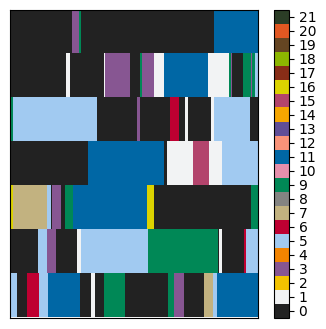

In [11]:
#get the entropy matrixes and syllable usages for certain group of animals
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

normalize='bigram' # normalization method ("bigram", "rows" or "columns")
plt_group = '6OHDA'
syll_include = 22
use_labels = [lbl for lbl, grp in zip(labels, label_group) if grp[:5] == plt_group]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

arr=labels_align(use_labels).T

list_colors = ['orangered', 'steelblue', 'olivedrab', 'tomato','royalblue',
              'goldenrod', 'seagreen', 'forestgreen', 'navy', 'midnightblue',
              'purple', 'wheat', 'darkmagenta','salmon', 'darkgoldenrod',
              'mistyrose', 'gold', 'darksalmon','mediumblue', 'darkviolet',
              'darkorange', 'moccasin']

list_colors2 = ['red', 'steelblue', 'olivedrab', 'red','steelblue',
              'goldenrod', 'olivedrab', 'olivedrab', 'steelblue', 'steelblue',
              'darkmagenta', 'goldenrod', 'darkmagenta', 'red', 'goldenrod', 
              'red', 'goldenrod',  'red', 'steelblue', 'darkmagenta',
              'red', 'goldenrod']

kelly_colors =  ['#222222', '#F2F3F4', '#F3C300', '#875692', '#F38400', '#A1CAF1', '#BE0032', '#C2B280', '#848482', '#008856', '#E68FAC', '#0067A5', '#F99379', '#604E97', '#F6A600', '#B3446C', '#DCD300', '#882D17', '#8DB600', '#654522', '#E25822', '#2B3D26']
trubetskoy_colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000']


list_syllables = ['rear','stop','turn','rear','stop',
                 'walk','turn','turn','hunch','stop',
                 'groom','walk','groom','rear','walk',
                 'rear','run','rear','stop','groom',
                 'rear', 'walk']



cmap1=matplotlib.colors.ListedColormap(list_colors, name='from_list', N=22)
cmap2=LinearSegmentedColormap.from_list("mycmap", kelly_colors, N=22)

figsize = (4,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig1 = plt.imshow(arr[[4,5,2,0,1,3,6],200:500], cmap=cmap2, vmin=0, vmax=22, aspect='auto', interpolation='none')
ax.set_xticks([])
ax.set_yticks([])
cb = plt.colorbar(fig1)
cb.ax.set_yticks([k+0.5 for k in range(22)])
cb.ax.set_yticklabels(k for k in range(22))
#cb.ax.set_yticklabels(k for k in list_syllables)
#cb.yaxis.set_major_formatter(ticker.NullFormatter())
#cb.yaxis.set_minor_locator(ticker.FixedLocator(list(k+0.5 for k in range(22))))
#cb.yaxis.set_minor_formatter(ticker.FixedFormatter(k for k in list_syllables))

save_analysis_figure(fig, 'Syllable_labels_6OHDA_sorted_short_Kelly_colors2', project_dir, model_name, save_dir=None)


In [70]:
behav_struct = pd.DataFrame(columns=['Transitions', 'Unique', 'Entropy', 'Entropy_transitions', 'Local Entropy', 'Group'])   #make a dataframe

In [71]:
plt_group = '6OHDA'
syll_include = 22
use_labels = [lbl for lbl, grp in zip(labels, label_group) if grp[:5] == plt_group]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

ent = entropy_rate(use_labels, use_tmxs, truncate_syllable=20, normalize='bigram', smoothing=1.0, tm_smoothing=1.0)
ent2 = entropy_rate2(use_labels, use_tmxs, truncate_syllable=20, normalize='bigram', smoothing=1.0, tm_smoothing=1.0)
ent3 = []
ent4 = []
ent5 = []


for k in use_tmxs:
    ent3.append(np.sum(local_entropy(k, truncate_syllable=20)))

for k in use_tmxs:
    ent4.append(np.max(local_entropy(k, truncate_syllable=20)))

for k in use_tmxs:
    ent5.append(np.argmax(local_entropy(k, truncate_syllable=20)))


uni = labels_unique(use_labels)
tra = labels_transition(use_labels)
df = {'Transitions': tra, 'Unique': uni, 'Entropy': ent, 'Entropy_transitions': ent2, 'Local Entropy': ent3, 'Local Entropy Max': ent4, 'Max Entropy Syllable': ent5, 'Group': plt_group}

behav_struct = pd.concat([behav_struct, pd.DataFrame(df)])
behav_struct
#behav_struct.to_csv('/behavioral_structure_6ohda.csv')

C:\Users\db1671\AppData\Local\Temp\ipykernel_32644\2014070413.py:27: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Transitions,Unique,Entropy,Entropy_transitions,Local Entropy,Group,Local Entropy Max,Max Entropy Syllable
0,1.444185,33,0.432257,8.643802,5.574357,6OHDA,1.147368,0.0
1,1.483984,30,0.432243,8.643817,5.803904,6OHDA,1.170024,0.0
2,1.437351,33,0.432240,8.643818,5.757065,6OHDA,1.128498,0.0
3,1.507383,29,0.432265,8.643794,5.477778,6OHDA,1.146199,0.0
4,1.258100,32,0.432240,8.643817,5.449486,6OHDA,0.962807,0.0
5,1.400006,32,0.432240,8.643814,5.816027,6OHDA,1.115769,0.0
6,1.824477,31,0.432229,8.643826,5.530334,6OHDA,0.944927,4.0


In [72]:
behav_struct.sort_values(by = ['Transitions'])

,Transitions,Unique,Entropy,Entropy_transitions,Local Entropy,Group,Local Entropy Max,Max Entropy Syllable
4,1.258100,32,0.432240,8.643817,5.449486,6OHDA,0.962807,0.0
5,1.400006,32,0.432240,8.643814,5.816027,6OHDA,1.115769,0.0
2,1.437351,33,0.432240,8.643818,5.757065,6OHDA,1.128498,0.0
0,1.444185,33,0.432257,8.643802,5.574357,6OHDA,1.147368,0.0
1,1.483984,30,0.432243,8.643817,5.803904,6OHDA,1.170024,0.0
3,1.507383,29,0.432265,8.643794,5.477778,6OHDA,1.146199,0.0
6,1.824477,31,0.432229,8.643826,5.530334,6OHDA,0.944927,4.0


In [31]:
behav_struct.to_csv('6ohda/behavioral_structure_6ohda.csv')

In [33]:
behav_struct = pd.read_csv('6OHDA_DLC/6ohda/behavioral_structure_6ohda.csv')
behav_struct['Phenotype'] = behav_struct['Group'].str[:2]
behav_struct

,Unnamed: 0,Transitions,Unique,Entropy,Entropy_transitions,Local Entropy,Group,Phenotype
0,0,1.842252,34,0.432246,8.643814,5.743390,Control,Co
1,1,1.906179,36,0.432244,8.643812,5.588057,Control,Co
2,2,1.769614,35,0.432240,8.643816,5.752054,Control,Co
3,3,1.753420,36,0.432232,8.643822,5.936571,Control,Co
4,4,1.834793,35,0.432247,8.643811,5.848079,Control,Co
5,5,1.715978,35,0.432242,8.643814,5.831574,Control,Co
6,0,1.444185,33,0.432257,8.643802,5.574357,6OHDA,6O
7,1,1.483984,30,0.432243,8.643817,5.803904,6OHDA,6O
8,2,1.437351,33,0.432240,8.643818,5.757065,6OHDA,6O
9,3,1.507383,29,0.432265,8.643794,5.477778,6OHDA,6O


In [55]:
# Calculating statistics with scipy

import scipy
from itertools import product

def calculate_stats(df, parameter):
    pvalues = []
    pvalue_asterisks = []
    x_values = df["Group"].unique()
    
    for x in product(x_values, x_values):
            stat, pvalue = scipy.stats.ttest_ind(
                df.loc[df["Group"] == x[0], parameter],
                df.loc[df["Group"] == x[1], parameter]
            )
            
            pvalues.append(pvalue)
    
    stars=dict(zip(product(x_values, x_values),pvalues))

    for key, value in stars.items():
        print(f"{key}: {value}")


calculate_stats(behav_struct, 'Local Entropy')

('Control', 'Control'): 1.0
('Control', '6OHDA'): 0.07738093346952142
('6OHDA', 'Control'): 0.07738093346952142
('6OHDA', '6OHDA'): 1.0


Saved figure to 6OHDA_DLC\6ohda\figures\Local Entropy.png


C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\db1671\AppData\Local\Temp\ipykern

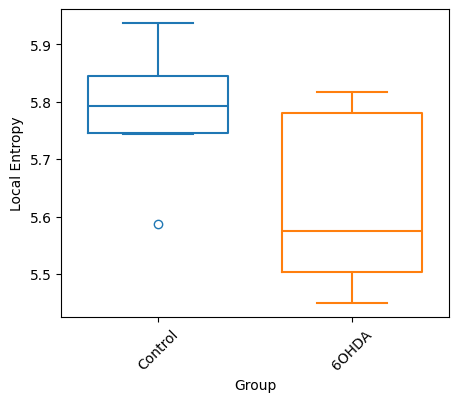

In [40]:
# Plotting entropy parameters using seaborn
import seaborn as sns

figsize = (5,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.boxplot(data=behav_struct, x='Group', y='Local Entropy', hue='Phenotype', gap=0.1, fill=False, ax=ax, legend=False)
ax.set_xticklabels(['Control', '6OHDA'], rotation=45)
#sns.stripplot(data=behav_struct, x='Group', y='Transitions', color=['blue','orange','orange','orange'], jitter=0.2, size=2.5, ax=ax)
#ax.set_ylabel('Transitions/sec')
save_analysis_figure(fig, 'Local Entropy', project_dir, model_name, save_dir=None)
#ax.set_ylim([0, 4])

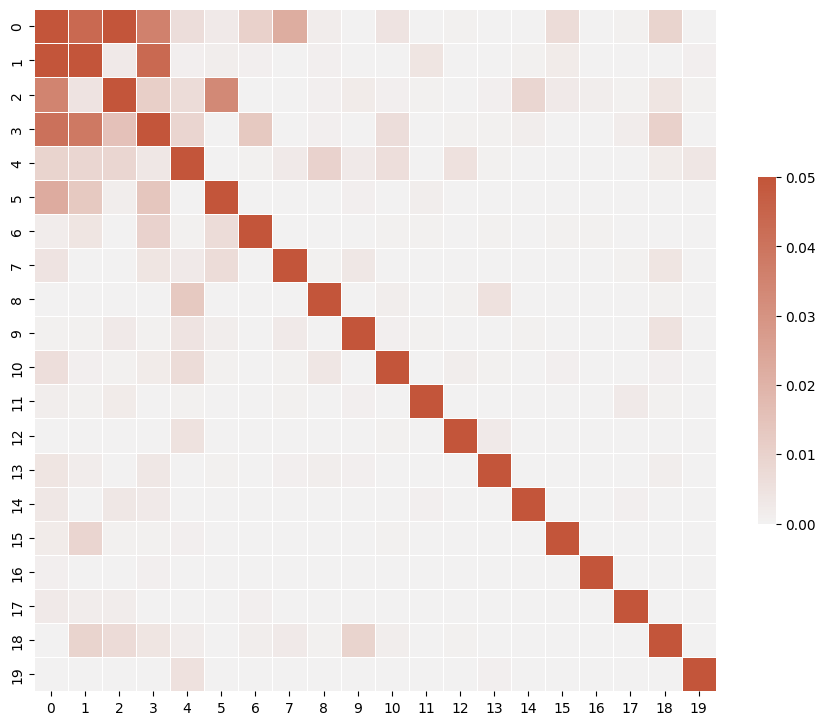

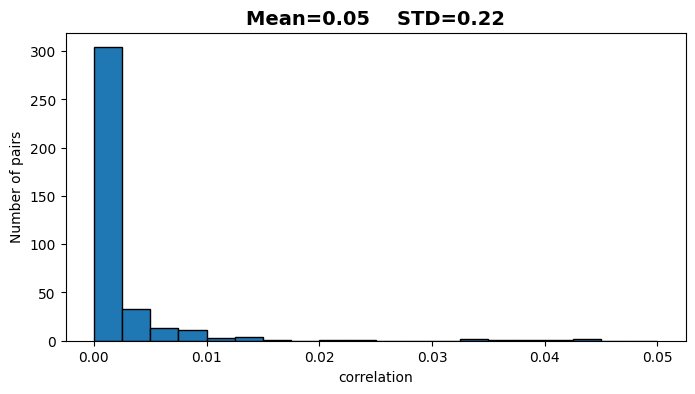

In [119]:
#Threshold Probability matrices to determine more probable modules

plt_group = 'Contr'
syll_include = 20
use_labels = [lbl for lbl, grp in zip(labels, label_group) if grp[:5] == plt_group]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

def plot_correlation(corr = np.array, diagonal=True, mask=False, annot=False, cdf=False, Vmin=0, Vmax=0.25, Thresh=0.1):        
    #Plot the correlation as a triange seaborn matrix
    
    #get rid of the diagonal in symmetric matrix
    if diagonal==False:
        np.fill_diagonal(corr,1)
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    # Generate a mask for the upper triangle
    if mask==True:
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, cmap=cmap, center=0,
                    square=True, annot=annot, mask=mask | (np.abs(corr) <= Thresh), vmin=Vmin, vmax=Vmax, linewidths=.5, cbar_kws={"shrink": .5})
    else:    
        sns.heatmap(corr, cmap=cmap, center=0,
                    square=True, annot=annot, vmin=Vmin, vmax=Vmax, linewidths=.5, cbar_kws={"shrink": .5})
    
    
    fig1 = plt.figure(figsize=(8, 4))
    ax1 = fig1.add_subplot() 
    frq1, edges1 = np.histogram(corr, bins=20, range=(Vmin,Vmax))
    ax1.set_title('Mean={0:.2f}    STD={1:.2f}'.format(corr.mean(), corr.std()), {'fontsize': 14,
 'fontweight' : 'bold'})
    ax1.bar(edges1[:-1], frq1, width=np.diff(edges1), edgecolor="black", align="edge")
    ax1.set_xlabel('correlation')
    ax1.set_ylabel('Number of pairs')
    
    if cdf==True:
        fig2 = plt.figure(figsize=(8, 4))
        ax2 = fig2.add_subplot()
        ax2.hist(corr.flatten(), bins=20, range=[Vmin,Vmax], density=True, cumulative=True, histtype='step', label='cumulative distribution')
        ax2.set_xlabel('Correlation')
        ax2.set_ylabel('Proportion')

def reachability_matrix(C, threshold=0.05):
    P = np.zeros_like(C)
    P[C>threshold] = C[C>threshold] 
    n = P.shape[0]
    R = P.copy()  # Initialize with the transition matrix

    for _ in range(n):
        R = np.logical_or(R, np.dot(R, P))

    return R.astype(int)

def communicating_classes(R):
    n = R.shape[0]
    classes = []
    visited = set()

    for i in range(n):
        if i not in visited:
            comm_class = {j for j in range(n) if R[i, j] and R[j, i]}
            classes.append(comm_class)
            visited.update(comm_class)

    return classes


plot_correlation(use_tmxs[0][:syll_include,:syll_include], diagonal = False, Vmin=0, Vmax=0.05)

In [ ]:
#Reachability matrix (interconnected syllable network)

R = reachability_matrix(use_tmxs[6][:syll_include,:syll_include])
print(R)

In [131]:
#Communicative classes (interconnected syllable network)

classes = communicating_classes(R)
print(classes)

[{0, 1}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set()]


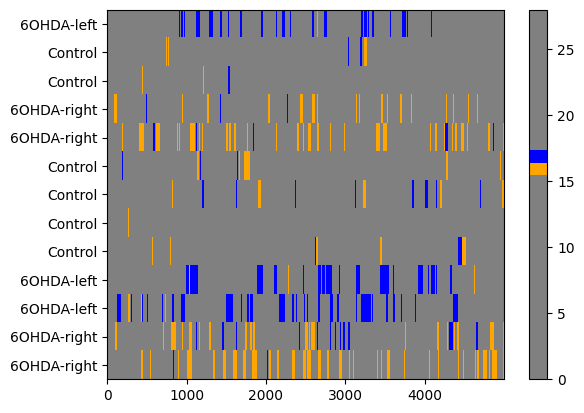

In [28]:
#HIghlighting certain syllables in a colormap

import matplotlib

arr=labels_align(labels).T

#list_colors = ['grey', 'grey', 'orange', 'grey','grey',
#              'grey', 'grey', 'grey', 'grey', 'grey',
#              'blue', 'grey', 'grey','grey', 'grey']

list_colors = ['grey', 'grey', 'grey', 'grey','grey',
              'grey', 'grey', 'grey', 'grey', 'grey',
              'grey', 'grey', 'grey','grey', 'grey',
              'grey', 'orange', 'blue','grey', 'grey',
              'grey', 'grey', 'grey','grey', 'grey',
              'grey', 'grey', 'grey', 'grey']

cmap1=matplotlib.colors.ListedColormap(list_colors, name='from_list', N=29)

fig1 = plt.imshow(arr[:,:5000], cmap=cmap1, vmin=0, vmax=28, aspect='auto', interpolation='none')
ax1 = plt.gca()
ax1.set_yticks(list(range(13)),label_group)
plt.colorbar()

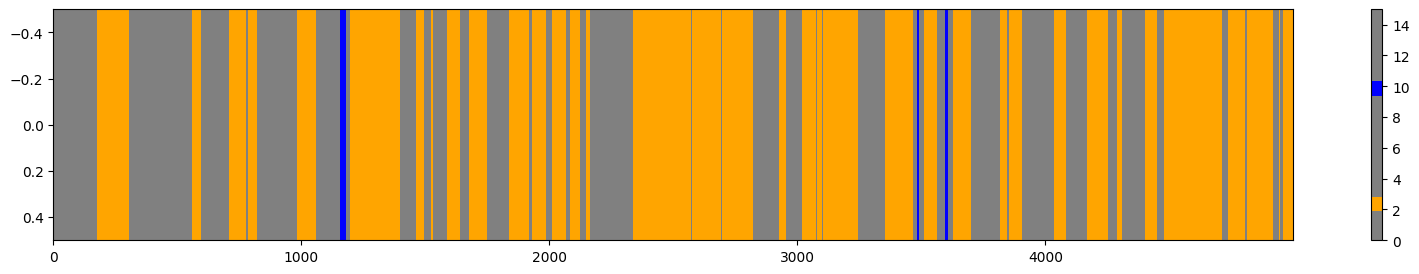

In [142]:
#need to get plot for first and last animals to make a live plot

#syll_include = 16
use_labels = [labels[12]]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

arr=labels_align(use_labels).T
plt.figure(figsize=(20, 3)) 
plt.imshow(arr[:,:5000], cmap=cmap1, vmin=0, vmax=15, aspect='auto', interpolation='none')
plt.colorbar()


.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Done!
.

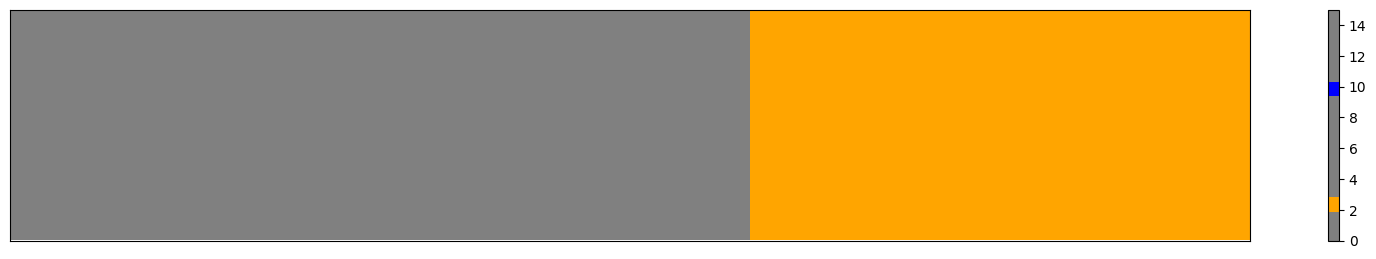

In [144]:
# Making a moving live plot with highlighted syllables
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.

import random
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation

record_numb = 12
syll_include = 15

# Open the data for animation
use_labels = [labels[record_numb]]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)
arr=labels_align(use_labels).T


fps = 30
nSeconds = 600
#video_part = math.floor((arr.shape[1]-30))
video_part = nSeconds * fps
snapshots = [ arr[:,k:(k+300)] for k in range(0,video_part,1) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(20, 3)) 
a = snapshots[0]
im = plt.imshow(a, cmap=cmap1, vmin=0, vmax=15, aspect='auto', interpolation='none')
plt.colorbar()
plt.xticks([])
plt.yticks([])

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = int(nSeconds * fps),
                               interval = 1000 / fps, # in ms
                               )

FFwriter = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('animation12.mp4', writer=FFwriter)


print('Done!')

#plt.show()  # Not required, it seems!